In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
import sys
sys.path.append("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Functions")
from Functions_Squat import signed_error, features_front, equal_lengths, features_side_R

To avoid compounding errors, the data used for the training of the fuzzy inference systems will not be segmented with the GRU model. Rather, they will be segmented manually, very similar to how the data was prepared to train the GRU.

There is less data to process than before, therefore, write this code to deal with one video at a time.

In [3]:
#list1 is the times at which the class changes
#list2 is the class label of each time chunk

#For video called 1(6) in correct training data.
# list1 = [0,0.11,0.83,1.4,2.19,2.96,3.56,4.33,5.04,5.64,6.49,7.31,7.81,8.57,9.38,9.93,10.71,11.49,11.97,12.83,13.62,14.06,14.86,15.62,16.1,16.85,17.63]
# list2 = [2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called 1(7) in correct training data
# list1 = [0,1.43,2.14,2.91,3.33,4.06,4.9,5.4,6.15,6.92,7.49,8.28,9.11,9.63,10.31,11.04,11.61,12.34,13.07,13.57,14.28,15.02]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called "Caving Knees"
# list1 = [0, 3.12, 4.38, 6.35, 7.62,8.83,10.71,11.77,13.04,14.8,15.98,17.4,19.37,20.09,21.57,23.43,24.06,25.5,27.13,28.12,29.48,31.15,32.87,34.47,35.89,36.74,38.6,39.78,40.74,42.24,43.95]
# list2 = [0, 2, 1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called "Wide Knees"
# list1 = [0,2.34,3.57,4.74,5.94,7.12,8.86,9.82,11.16,12.63,14.08,15.64,17.25,18.08,19.83,21.2,22.03,23.5,24.65,25.46,27,28.49]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For video called "Feet Very Wide"
# list1 = [0,2.18,3.5,4.56,5.33,6.87,8.08,9.04,10.43,11.82]
# list2 = [0,2,1,0,2,1,0,2,1,0]

#For Video called "Feet Moderately Wide"
# list1 = [0,1.09,2.25,3.56,4.33,5.75,6.87,7.79,9.12,10.22,11.21,12.47,13.72]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0]

#For Video called "Feet ModeratelyVery Wide"
# list1 = [0,1.04,2.18,3.22,3.92,5.53,6.64]
# list2 = [0,2,1,0,2,1,0]

#For Video called "Feet Moderately Close"
# list1 = [0,1.06,2.77,3.9,4.76,6.44,7.92,8.72,10.55,11.85]
# list2 = [0,2,1,0,2,1,0,2,1,0]

#For Video called "Feet Very Close"
# list1 = [0,0.32,2.23,3.47,4.39,5.98,7.1,8.37,10.1,11.55]
# list2 = [0,2,1,0,2,1,0,2,1,0]

#For Video called "Back Angle (front)"
# list1 = [0,2.35,3.66,4.68,5.97,7.26,8.31,10.74,11.82,12.97,13.69,14.96,16,18.83,20.08,21.15,22.09,23.38,24.55,26.04,27.23,28.33,29.15,30.42,31.5]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For Video called "Back Angle (side)"
# list1 = [0,5.52,6.61,8.84,9.34,10.37,11.82,12.33,13.33,14.81,15.37,16.46,18,18.57,19.73,21.09,22.49,23.74,24.51,25.11,26.3,27.26,27.8,29,30.19,30.69,32,33.22,33.53,34.9,36.21,39.51,40.49,42.27,42.77,43.71,45.03,45.24,46.36,47.78,48.33,49.49,50.53]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For Video called "Heel Lift"
list1 = [0,2.73,4.5,5.69,6.18,7.74,9.09,9.54,10.95,12.51,13.68,15.64,16.78,17.4,19.34,20.35,21.01,22.85,24.23,24.82,26.55,27.8]
list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

#For Video called "Incomplete rep (side)"
# list1 = [0,3.38,5,6.73,6.95,8.36,9.77,10.26,11.86,13.27,13.95,15.47,16.8,17.34,18.93,20.38,21.37,22.66,23.91,24.29,26.65,27.91,28.10,29.66,30.84,31.18,32.71,33.82,34.34,35.77,36.86,37.55,38.86,39.77]
# list2 = [0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0,2,1,0]

len(list1),len(list2)

(22, 22)

In [4]:
#initiallize empty lists
con = []
ecc = []

path = "C:\\Users\\Cian\\Downloads\\Squat Training\\Heel Lift.mp4"
# path = "C:\\Users\\Cian\\Downloads\\Squat Vids\\1 (6).mp4"
Features = features_side_R(path)
print(Features.shape)

#Loop through list2
for j in range(len(list2)):
    if list2[j] == 0 or j==0:
        pass
    elif list2[j] == 1:
        #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
        ind1 = int(list1[j]*15)
        ind2 = int(list1[j+1]*15)
        #append the angles within this range to the concentric list above "con"
        con.append(Features[ind1:ind2])
    elif list2[j] == 2:
        #find the index range that will extract the correct range of angles. Note that the FPS of the video is 15.
        ind1 = int(list1[j]*15)
        ind2 = int(list1[j+1]*15)

        #append the angles within this range to the concentric list above "con"
        ecc.append(Features[ind1:ind2])

(424, 3)


Extract only the feature of interest.

In [5]:
#go from 1:2 to keep dimension
con_act = [rep[:,2:3] for rep in con]
ecc_act = [rep[:,2:3] for rep in ecc]

#Now interpolate to get path of N=100 points
N=100
con_act = equal_lengths(con_act, N)
ecc_act = equal_lengths(ecc_act, N)

#Now call the relevant regression function to find the correct path
con_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Side Concentric.npz")
ecc_model = np.load("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Side Eccentric.npz")
time = np.linspace(0,1,N)
T = np.stack((np.ones(N),time,time**2))

################
#For Non Angles#
################
con_corr = (con_model['Vertical Hip to knees']@T).reshape(N,1)
ecc_corr = (ecc_model['Vertical Hip to knees']@T).reshape(N,1)

#now find error
err_con = con_act - con_corr
err_ecc = ecc_act - ecc_corr

############################
#For Angles, uncomment this#
############################
# con_corr = np.rad2deg(np.arctan2(con_model['Torso'][1]@T,con_model['Torso'][0]@T)).reshape(N,1)
# ecc_corr = np.rad2deg(np.arctan2(ecc_model['Torso'][1]@T,ecc_model['Torso'][0]@T)).reshape(N,1)

# # Now find the error
# err_con = np.rad2deg(con_act) - con_corr
# err_ecc = np.rad2deg(ecc_act) - ecc_corr

con_model

NpzFile 'C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Technique Modelling\\Models\\Side Concentric.npz' with keys: Torso, Heel Height, Vertical Hip to knees

Text(0.5, 1.0, 'Concentric Contraction')

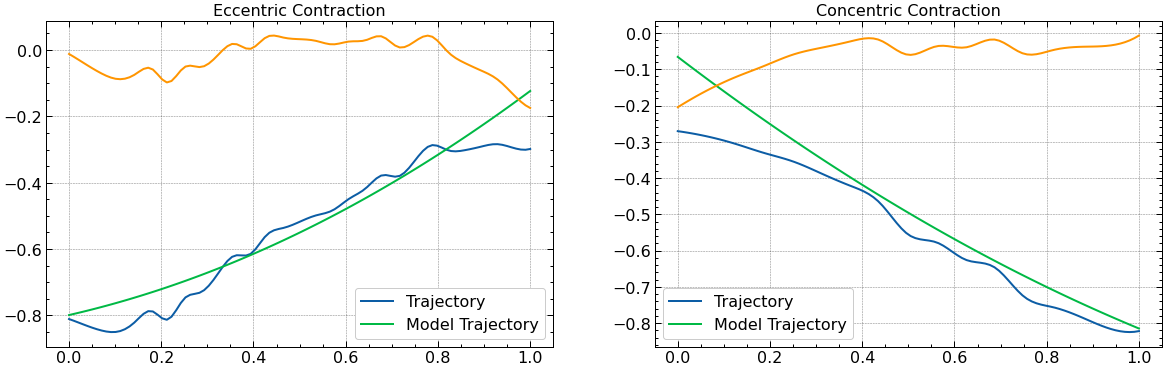

In [6]:
t = np.linspace(0,1,con_act.shape[1])
rep = 3

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(t,ecc_act[rep,:], label='Trajectory')
ax1.plot(t,ecc_corr, label='Model Trajectory')
ax1.plot(t,err_ecc[rep,:])
# ax1.set_ylim(-0.7,0)
ax1.legend()
ax1.set_title('Eccentric Contraction')
# ax1.set_ylim(-180,180)

ax2.plot(t,con_act[rep,:], label='Trajectory')
ax2.plot(t,con_corr, label='Model Trajectory')
ax2.plot(t,err_con[rep,:])
# ax2.set_ylim(-0.7,0)
ax2.legend()
ax2.set_title('Concentric Contraction')
# ax2.set_ylim(-180,180)

Now split the trajectory into three parts and average the five maximum errors.

In [7]:
#first acquire the means for all concentric repetitions
means_con = []
for i in range(len(err_con)):
    stages = np.array_split(err_con[i,:],3)
    means_con.append([np.mean(stage[np.argsort(np.abs(stage[:,0]))][-15:]) for stage in stages])
    
means_con = np.array(means_con)

#first acquire the means for all concentric repetitions
means_ecc = []
for i in range(len(err_ecc)):
    stages = np.array_split(err_ecc[i,:],3)
    means_ecc.append([np.mean(stage[np.argsort(np.abs(stage[:,0]))][-15:]) for stage in stages])
    
means_ecc = np.array(means_ecc)

means_ecc, means_con

(array([[-0.09082877,  0.07713167,  0.07195129],
        [-0.06043192,  0.08843848,  0.17730843],
        [-0.0543084 , -0.05259369,  0.03568055],
        [-0.08079702,  0.03536212, -0.09368018],
        [-0.05931158,  0.04223472, -0.01220526],
        [-0.05363721,  0.03568508,  0.07851653],
        [-0.07657755, -0.07615706, -0.00945893]]),
 array([[ 0.09734334,  0.04457608, -0.07602626],
        [ 0.07171542, -0.11288674, -0.12016109],
        [ 0.03690567, -0.07105072, -0.06378677],
        [-0.15581931, -0.04658648, -0.04884415],
        [-0.09924278, -0.01900561, -0.01268974],
        [ 0.05102712, -0.06142295, -0.08659513],
        [-0.04920825, -0.05781738, -0.06785946]]))

Now create labels and then concatenate then save.

In [89]:
Data = np.concatenate((means_con, means_ecc))
# Labels = np.zeros_like(Data)

#Score for caving knees
# ecc_lab = np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0], [-0.3,-1,-0.1],[-0.3,-1,-1],[-0.5,-0.8,-1]])
# con_lab = np.array([[0, -0.3, 0],[-0.2, -0.5, 0],[0,0,0],[0, -1, -1],[0,0,0],[0, -1, -1],[0,-0.5,-0.5], [-1,-1,-0.5], [-1,-1,-1], [-1,-1,-0.6]])

#Score for wide knees
# con_lab = np.array([[1,1,0.7],[1,1,0.7],[1,1,0.7],[1,1,0.7],[1,0.9,0.7],[1,0.9,0.7]])
# ecc_lab = np.array([[0.7,1,1],[0.7,1,1],[0.7,1,1],[0.7,1,1],[0.7,0.9,1],[0.7,0.9,1]])

#score for front torso angle
# con_lab = [[-0.5,-0.5,-0.5],[-0.5,-0.5,-0.5],[-0.75,-8,-9],[-1,-1,-1],[0.5,0.5,0.5],[0.5,0.5,0.5],[1,1,1],[1,1,1]]
# ecc_lab = [[-0.5,-0.5,-0.5],[-0.5,-0.5,-0.5],[-1,-0.9,-0.75],[-0.75,-0.9,-1],[0.5,0.5,0.5],[0.5,0.5,0.5],[1,1,1],[1,1,1]]

#Score for side torso angle
# con_lab = [[0.5,1,0.8],[0.5,1,0.8],[0.5,1,0.8],[0.2,0.6,0.9],[0.3,0.7,0.9],[0.5,0.2,0.2],[0.5,0.5,0.4],[0.5,0.5,0.4],[0.5,0.5,0.4],[0.7,0.6,0.5],[0.5,1,0.8],[0.5,1,0.8],[1,1,0.5],[1,0.7,0.3]]
# ecc_lab = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0.6,1,1],[0.5,0.8,1],[0.5,0.8,1],[0.4,0.7,9],[0.5,0.8,1],[0,0,0],[0,0.3,0.5],[0.4,0.6,8],[0.6,0.8,1]]

#Score for Heel Lift
# con_lab = np.array([[1,1,0.3],[1,0.5,0],[0.8,0.3,0],[0.8,0.3,0],[0,0.2,0.8],[1,0.3,0],[1,0.4,0]])*-1
# ecc_lab = np.array([[0,0,1],[0,0.5,1],[0,0.3,0.8],[0,0.2,0.8],[0,0.2,0.8],[0,0.5,1],[0,0.5,1]])*-1

#Score for Vertical Hip to Knee (side)
con_lab = [[]]
ecc_lab = [[]]

Labels = np.concatenate((con_lab, ecc_lab))

#save
np.savetxt("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Feedback\\Data\\Training Data - Fuzzy Logic\\Heel Lift\\Data.txt", Data)
np.savetxt("C:\\Users\\Cian\\1 FYP Code\\Code_with_git\\Prototype 3\\Feedback\\Data\\Training Data - Fuzzy Logic\\Heel Lift\\Labels.txt", Labels)
Labels.shape, Data.shape

((14, 3), (14, 3))